# The Van der Waal's gas

Consider again the equation of state of an ideal gas:
$$
    P V = Nk_{\rm B}T = n R T
$$
This equation leads to isotherms as plotted in the left of the below figure. To try and make this equation match the observed behaviour of real gases, we can think of two simple modifications:

1. Allow for non-zero molucule size. In essence, this means that molecules are no longer free to travel anywhere within the gas - instead, the volume they can probe is reduced slightly by the volume taken up by other molecules. We can simply parameterise thisas $V\to V-n b$, where b is somehow related to the molecule size.
2. Allow for molecular attraction. If the molar density of the gas is given by $n/V$, then the change in energy related to $\frac{an^2}{V^2} {\rm d}V$. This effectively increases the pressure we should see in the gas relative to the ideal pressure by $P=P_{\rm ideal} +\frac{a n^2}{V^2}$

These modifications then give Van Der Waal's equation of state
$$
    \left(P + \frac{a n^2}{V^2}\right) (V-n b) = n R T
$$
This equation leads to isotherms as plotted on the right of the below figure.

#### Aside
This same equation can be arrived at in a more formal manner by considering the following. If we let the partition function for our gas be
$$
    Z_N = \frac{1}{N!}\left(\frac{V-n b}{\lambda _{\rm th}^3}\right)^N e^{- \beta (- a n^2/V)}
$$
where again we've reduced the volume to account for the volume taken up by other molecules, and included an additional energy term in the partition function related to the interaction energy $-a n^2/V$. We can then calculate the Hemlholtz free energy using $F=-k_{\rm B}T \ln (Z_N)$ and then $P=-\left(\frac{\partial F}{\partial V} \right)_T$ to get the above equation of state.

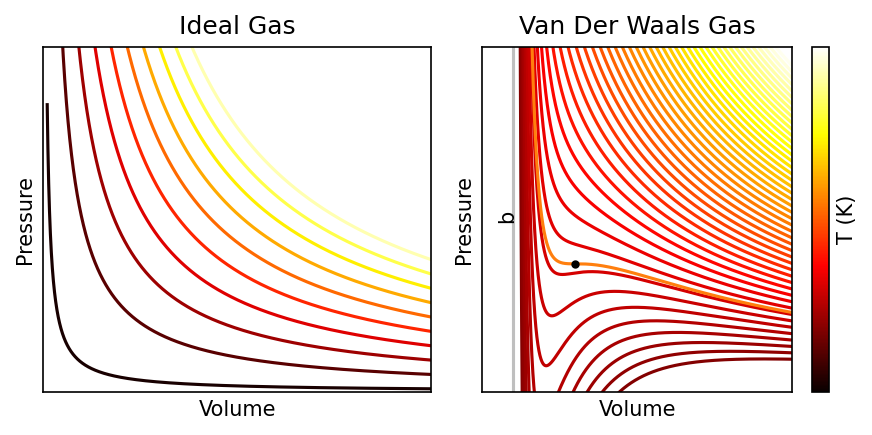

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import astropy.units as u
import astropy.constants as c
import warnings
warnings.filterwarnings('ignore')

#Defining equations of state
def ideal_gas(V,T):
    P = c.R*T/V*u.mol
    return (P)

def VDW_gas(V,T,a,b):
    P = c.R*T*u.mol/(V-b)-a/V**2
    return P

#Defining arrays
T_Ideal = np.arange(1,250,5)*u.K
V_Ideal = np.arange(0.01,1.02,0.0001)*u.m**3
T_VDW = np.arange(21,250,2)*u.K
V_VDW = np.arange(0.1,1.02,0.0001)*u.m**3
a = 1e2*u.J*u.m**3
b = 0.1*u.m**3
T_c = 8*a/(27*c.R*b*u.mol)
P_c = a/(27*b**2)
V_c = 3*b

fig,ax = plt.subplots(nrows=1,ncols=2,figsize=[6,3],dpi=150)
# Plotting Ideal Gas
for T_i in T_Ideal:
    P_ideal = ideal_gas(V_Ideal,T_i)
    ax[0].plot(V_Ideal,P_ideal,'-',c=cm.hot(T_i/len(T_Ideal)),label='')
# Plotting VDW Gas    
for T_i in T_VDW:
    P_VDW = VDW_gas(V_VDW,T_i,a=a,b=b)
    im = ax[1].plot(V_VDW,P_VDW,'-',c=cm.hot(T_i/len(T_VDW)),label='')
ax[1].plot(V_VDW, VDW_gas(V_VDW,T_c,a=a,b=b),color='C1')
ax[1].plot(V_c,P_c,'k.')
ax[1].axvline(0.1,color='grey',alpha=0.5)
ax[1].text(0.05,500,'b',rotation=90)
    
#Adding colorbar
sm = plt.cm.ScalarMappable(cmap='hot',norm=cm.colors.Normalize(vmin=min(T_VDW.value),vmax=max(T_VDW.value)))
cbar = fig.colorbar(sm, label='T (K)')
cbar.set_ticks([])

#Customising Plot
for axes in ax:
    axes.set_xlim(0.0,1)
    axes.axes.get_xaxis().set_ticks([])
    axes.set_ylim(0,1000)
    axes.axes.get_yaxis().set_ticks([])
    axes.set_ylabel("Pressure")
    axes.set_xlabel("Volume")
ax[0].set_title("Ideal Gas")
ax[1].set_title("Van Der Waals Gas")
plt.tight_layout()
plt.savefig("Figures/Isotherms.jpg")
plt.show()

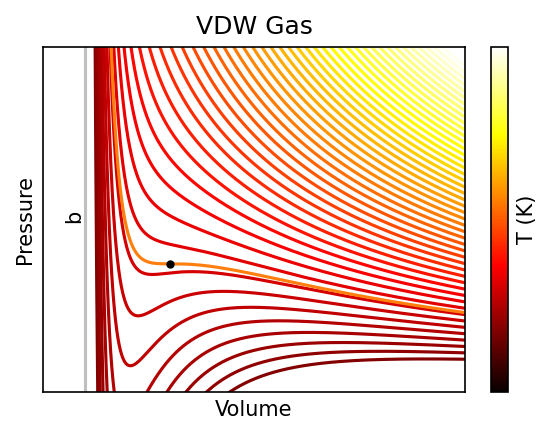

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import astropy.units as u
import astropy.constants as c
import warnings
warnings.filterwarnings('ignore')

#Defining equations of state
def ideal_gas(V,T):
    P = c.R*T/V*u.mol
    return (P)

def VDW_gas(V,T,a,b):
    P = c.R*T*u.mol/(V-b)-a/V**2
    return P

#Defining arrays
T_Ideal = np.arange(1,250,5)*u.K
V_Ideal = np.arange(0.01,1.02,0.0001)*u.m**3
T_VDW = np.arange(21,250,2)*u.K
V_VDW = np.arange(0.1,1.02,0.0001)*u.m**3
a = 1e2*u.J*u.m**3
b = 0.1*u.m**3
T_c = 8*a/(27*c.R*b*u.mol)
P_c = a/(27*b**2)
V_c = 3*b

fig,ax = plt.subplots(nrows=1,ncols=1,figsize=[4,3],dpi=150)
# Plotting Ideal Gas
for T_i in T_Ideal:
    P_ideal = ideal_gas(V_Ideal,T_i)
    #ax.plot(V_Ideal,P_ideal,'-',c=cm.hot(T_i/len(T_Ideal)),label='')
# Plotting VDW Gas    
for T_i in T_VDW:
    P_VDW = VDW_gas(V_VDW,T_i,a=a,b=b)
    im = ax.plot(V_VDW,P_VDW,'-',c=cm.hot(T_i/len(T_VDW)),label='')
ax.plot(V_VDW, VDW_gas(V_VDW,T_c,a=a,b=b),color='C1')
ax.plot(V_c,P_c,'k.')
ax.axvline(0.1,color='grey',alpha=0.5)
ax.text(0.05,500,'b',rotation=90)
    
#Adding colorbar
sm = plt.cm.ScalarMappable(cmap='hot',norm=cm.colors.Normalize(vmin=min(T_VDW.value),vmax=max(T_VDW.value)))
cbar = fig.colorbar(sm, label='T (K)')
cbar.set_ticks([])

#Customising Plot
ax.set_xlim(0.0,1)
ax.axes.get_xaxis().set_ticks([])
ax.set_ylim(0,1000)
ax.axes.get_yaxis().set_ticks([])
ax.set_ylabel("Pressure")
ax.set_xlabel("Volume")
ax.set_title("VDW Gas")
#ax[1].set_title("Van Der Waals Gas")
plt.tight_layout()
plt.savefig("Figures/Isotherms_VDW.jpg")
plt.show()

The Van der Waals equation of state behaves like the Ideal gas at high temperatures (the yellow curves to the top right of the plot). However, at low temperatures, the isoterms begin to exhibit a kink. To figure out what this represents, recall that the isothermal compressability of a gas is defined as
$$
    \kappa_{T} = -\frac{1}{V}\left(\frac{\partial V}{\partial P}\right)_T
$$
For an ideal gas, this is always positive (as the last term is always negative, as the isoterms always have a negative slope). However, as we can see from the plot of the Van der Waals equation of state, at low temperatures, there are regions where $\left(\frac{\partial V}{\partial P}\right)_T$ is positive, meaning $\kappa_{T}$ becomes negative. Under such conditions, increases the pressure exerted on the gas causes the volume to increase rather than decrease. Given that this means work is done on the gas ($W=-P{\rm d} V$), then energy is provided to further increase the pressure - meaning this configuration is highly unstable!

There is a critical temperature whose isotherm does not have a positive gradient, but which has an inflection point - this is the critical temperature, and the inflection point is the critical point we encountered in the last lecture.

Let's now determine the location of this critical point for a Van der Waal's gas.

Solving the Van der Waal's equation for $P$, and assuming we're working with 1 mole, gives:
$$
    P = \frac{RT}{V-b} - \frac{a}{V^2}
$$
The inflection point occurs when
$$
    \left(\frac{\partial P}{\partial V}\right)_T = - \frac{RT}{(V-b)^2}+ \frac{2a}{V^3}=0
$$
and
$$
    \left(\frac{\partial ^2 P}{\partial V^2}\right)_T = \frac{2RT}{(V-b)^3}- \frac{6a}{V^4}=0
$$
Solving this both for $RT$ gives
$$
     \frac{2a(V-b)^2}{V^3} = RT = \frac{6a(V-b)^3}{2V^4}
$$
which gives
$$
    2 = \frac{3(V-b)}{V}
$$
and thus the critical volume is
$$
    V_{\rm C} = 3b
$$
Using this volume and the above equations then gives
$$
    T_{\rm C} = \frac{8a}{27 Rb}
$$
and
$$
    P_{\rm C} = \frac{a}{27 b^2}
$$

I'm not going to go into too detailed a discussion about what happens around this critical point. If you are more interested, I highly recommend section 26.1 of Blundell & Blundell,

# Heat Capacity of Solids

Continuing our discussion of how real systems differ from ideal gases, let's consider how heat capacities behave for solids. Imagine a solid with $N$ atoms can be modelled as a lattice, and that each atom is bonded to its neighbours by springs. This means there are 3$N$ springs in the system. As such, each atom is allowed to oscillate about its equilibrium position. Each "spring" has two quadratic modes of energy: one kinetic, and one potential, and so the equipartition of energy tells us that each spring has a mean energy
$$
    \langle E \rangle = 2 \times \frac{1}{2} k_{\rm B} T = k_{\rm B} T
$$
and that the mean energy of the system is then
$$
    \langle E \rangle = 3 N k_{\rm B} T
$$
The heat capacity of the solid is then
$$
    C = \frac{\partial \langle E \rangle}{\partial T} = 3 N k_{\rm B} = 3 R.
$$
That is, the heat capacity should be constant in this picture - this is known as the Dulong-Petit law, and experiments have found that expectation value for the heat capacity is very close to what's observed in a lot of systems around room temperature. However, because of the third law of thermodynamics, we would expect the heat capacity to go to 0 at low temperatures, which this treatment does not reproduce. So how do we fix this?

## Einstein's Theory

The answer comes from Eintein's model. In this model, we again assume that all atoms are linked via a spring. However, the key insight here is that, in accordance with quantum mechanics, the springs will only be able to oscillate with discrete energies.